# Training YOLOv5 on the ISIC dataset
---

#### Hannah Scholz
#### s4661678

---

##### Data is loaded in to Google Drive after executing the dataset.py file.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Make sure located in files not in another folder
%ls

drive/  sample_data/


In [11]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
%pip install -qr requirements.txt  

import torch
from yolov5 import utils
display = utils.notebook_init() 

YOLOv5 🚀 v6.2-198-gacff977 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/78.2 GB disk)


In [18]:
# After achive.zip is uploaded get from the drive and unzip into the required 
# directory
%ls
%cd content/drive/MyDrive/Colab \Notebooks

bin/      dev/   lib32/  NGC-DL-CONTAINER-LICENSE  root/  sys/    var/
boot/     etc/   lib64/  opt/                      run/   tmp/
content/  home/  media/  proc/                     sbin/  tools/
datalab/  lib/   mnt/    python-apt/               srv/   usr/
/content/drive/MyDrive/Colab Notebooks


In [26]:
%cd ..
%ls


/content
drive/  yolov5/


In [ ]:
!unzip drive/MyDrive/ColabNotebooks/Archive.zip -d yolov5/data/

In [29]:
f = open("dataset.yaml", "a")

f.write("train: ../data/images/training/\n")
f.write("test: ../data/images/testing/\n")
f.write("val: ../data/images/validation/\n")
f.write("nc: 2\n")
f.write("names: ['melanoma', 'healthy']\n")
f.close()

In [30]:
%ls

dataset.yaml  drive/  yolov5/


In [ ]:
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 10 --data ../dataset.yaml --weights yolov5s.pt

In [33]:
!python train.py --img 640 --batch 16 --epochs 50 --data ../dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-198-gacff977 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source data/images/training/ISIC_0000001.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images/training/ISIC_0000001.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-196-ge42c89d Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/data/images/training/ISIC_0000001.jpg: 640x640 1 melanoma, 12.7ms
Speed: 0.6ms pre-process, 12.7ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


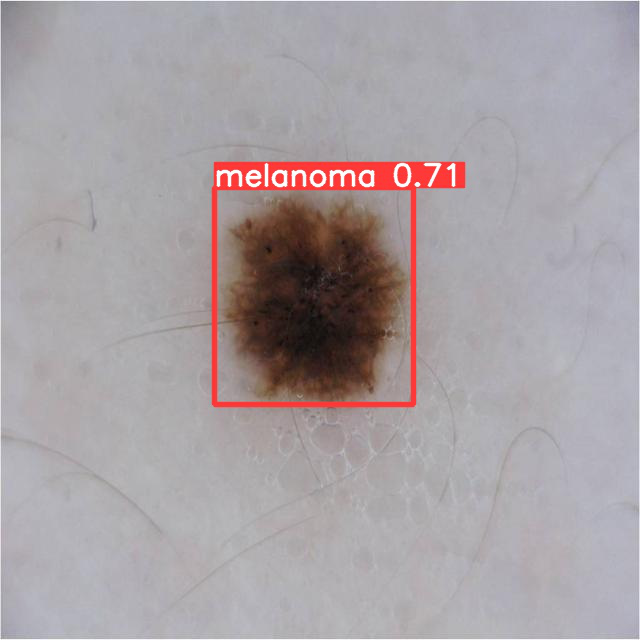

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp5/ISIC_0000001.jpg"
display(Image.open(image_path))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source data/images/training/ISIC_0000006.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images/training/ISIC_0000006.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-196-ge42c89d Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/data/images/training/ISIC_0000006.jpg: 640x640 1 melanoma, 12.7ms
Speed: 0.6ms pre-process, 12.7ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


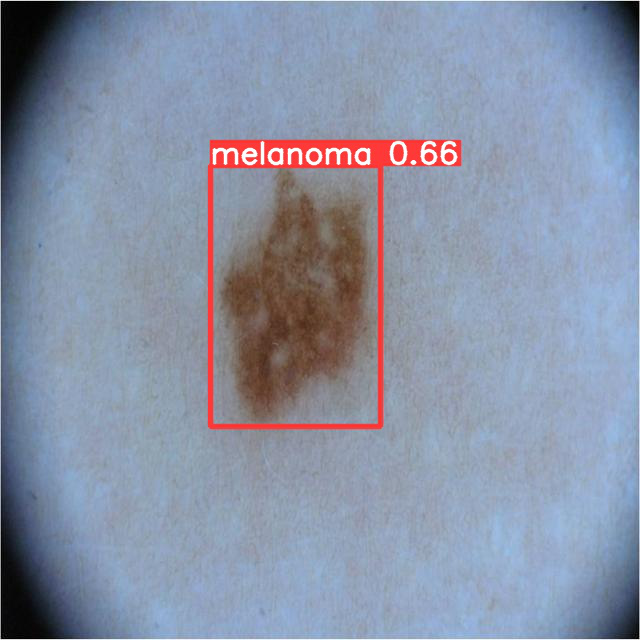

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp7/ISIC_0000006.jpg"
display(Image.open(image_path))